# IPL

Some call it a game of younger generation and some call it as power hitters game
So, while in India this IPL is gaining a lot of popularity I had a thought of analyzing which team does play the best What conditions suits them the most.. 
How has the team performed in last 5 yrs or soo..

1. Data Analysis

In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mt
import seaborn as sns
from bokeh.plotting import figure, output_file, show

In [4]:
df=pd.read_csv("C:\\Users\\welcome\\Desktop\\Varun\\Matches.csv")
'''Reading the data file which is in the form of csv through a through a python file reader method known as read_csv'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 18 columns):
id                 696 non-null int64
season             696 non-null int64
city               689 non-null object
date               696 non-null object
team1              696 non-null object
team2              696 non-null object
toss_winner        696 non-null object
toss_decision      696 non-null object
result             696 non-null object
dl_applied         696 non-null int64
winner             693 non-null object
win_by_runs        696 non-null int64
win_by_wickets     696 non-null int64
player_of_match    693 non-null object
venue              696 non-null object
umpire1            695 non-null object
umpire2            695 non-null object
umpire3            60 non-null object
dtypes: int64(5), object(13)
memory usage: 98.0+ KB


In [32]:
df.shape

(696, 18)

In [563]:
df.describe(include='all')

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
count,696.000000,696.000000,689,696,696,696,696,696,696,696.000000,693,696.000000,696.000000,693,696,695,695
unique,NaN,NaN,32,498,13,13,13,2,3,NaN,13,NaN,NaN,214,35,55,58
top,NaN,NaN,Mumbai,2012-04-21,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,field,normal,NaN,Mumbai Indians,NaN,NaN,CH Gayle,M Chinnaswamy Stadium,HDPK Dharmasena,S Ravi
freq,NaN,NaN,94,2,91,90,90,413,686,NaN,98,NaN,NaN,20,73,73,56
mean,974.103448,2012.965517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027299,NaN,13.472701,3.349138,NaN,NaN,NaN,NaN
std,2143.239623,3.069266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.163070,NaN,23.607994,3.411398,NaN,NaN,NaN,NaN
min,1.000000,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,174.750000,2010.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,348.500000,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,3.000000,NaN,NaN,NaN,NaN
75%,522.250000,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,19.000000,6.000000,NaN,NaN,NaN,NaN


In [34]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [35]:
df.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
691,7949,2018,Pune,20/05/18,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,5,L Ngidi,Maharashtra Cricket Association Stadium,Nitin Menon,Yeshwant Barde,Marais Erasmus
692,7950,2018,Mumbai,22/05/18,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,2,F du Plessis,Wankhede Stadium,Marais Erasmus,C Shamshuddin,S Ravi
693,7951,2018,Kolkata,23/05/18,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,field,normal,0,Kolkata Knight Riders,25,0,AD Russell,Eden Gardens,Nitin Menon,Anil Chaudhary,Kumar Dharmasena
694,7952,2018,Kolkata,25/05/18,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,14,0,Rashid Khan,Eden Gardens,Nitin Menon,Kumar Dharmasena,Anil Chaudhary
695,7953,2018,Mumbai,27/05/18,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,8,SR Watson,Wankhede Stadium,Marais Erasmus,S Ravi,Nitin Menon


2. Data Profiling

In [155]:
import pandas_profiling as pp
import pandas as pd

In [154]:
df100=pd.read_csv("C:\\Users\\welcome\\Desktop\\Varun\\Matches.csv")
profile=pp.ProfileReport(df100)
profile.to_file(outputfile="IPLDataReport.html")

In [7]:
'''So, it is time to find out which all teams do play in the IPL'''
df.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [18]:
'''Well over here I do observe that Rising Pune Supergiants can be clubbed with Rising Pune Supergiant in the column team1, team2, toss_winner and winner'''
df.winner.replace("Rising Pune Supergiant","Rising Pune Supergiants",inplace=True)
df.toss_winner.replace("Rising Pune Supergiant","Rising Pune Supergiants",inplace=True)
df.team1.replace("Rising Pune Supergiant","Rising Pune Supergiants",inplace=True)
df.team2.replace("Rising Pune Supergiant","Rising Pune Supergiants",inplace=True)
'''And,even by looking at the dataset I don't any importance for the 3rd umpire data. So, I'll drop that column'''
df.drop(['umpire3'],axis=1,inplace=True)

"And,even by looking at the dataset I don't any importance for the 3rd umpire data. So, I'll drop that column"

In [11]:
df.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors'], dtype=object)

3. IPL Analysis

3.1 Most titles won by a side

In [14]:
title=df.groupby(['season']).tail(1)
titles=title['winner'].value_counts()
titles

Chennai Super Kings      3
Mumbai Indians           3
Kolkata Knight Riders    2
Rajasthan Royals         1
Sunrisers Hyderabad      1
Deccan Chargers          1
Name: winner, dtype: int64

3.2 Total Matches played by individual teams

In [161]:
teamA=df['team1'].value_counts()
teamB=df['team2'].value_counts()
total_match=(teamA+teamB).sort_values(ascending=False)
total_match

Mumbai Indians                 171
Royal Challengers Bangalore    166
Kolkata Knight Riders          164
Kings XI Punjab                162
Delhi Daredevils               161
Chennai Super Kings            147
Rajasthan Royals               133
Sunrisers Hyderabad             93
Deccan Chargers                 75
Pune Warriors                   46
Rising Pune Supergiants         30
Gujarat Lions                   30
Kochi Tuskers Kerala            14
dtype: int64

3.3 Total wins for a particular side

In [162]:
highest_wins=df['winner'].value_counts().sort_values(ascending=False)
highest_wins

Mumbai Indians                 98
Chennai Super Kings            90
Kolkata Knight Riders          86
Royal Challengers Bangalore    79
Kings XI Punjab                76
Rajasthan Royals               70
Delhi Daredevils               67
Sunrisers Hyderabad            52
Deccan Chargers                29
Rising Pune Supergiants        15
Gujarat Lions                  13
Pune Warriors                  12
Kochi Tuskers Kerala            6
Name: winner, dtype: int64

Text(0.5,1,'Teams that won highest no. of Games')

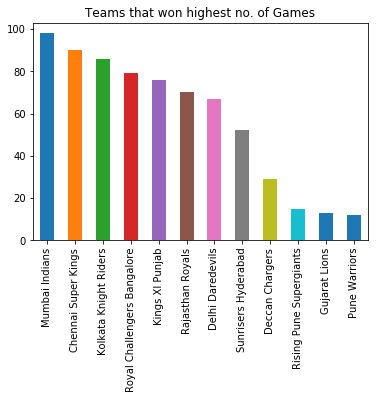

In [89]:
hwins=df['winner'].value_counts().head(12).plot.bar()
'''So, let's suppose that I don't know anything about IPL but the person to whom I am presenting the data should get a clear picture with my graphs'''
'''Over here I am finding out the most consistent team in all of the IPL seasons played till date'''
hwins.set_title("Teams that won highest no. of Games")

3.4 SEASONS IN WHICH MUMBAI INDIANS WON THE TITLE

In [205]:
va=df.groupby(['season']).tail(1)
var=va[va['winner']=='Mumbai Indians']
var['season']

58     2017
456    2013
575    2015
Name: season, dtype: int64

3.4 Stacked Plot that will showcase Total matches and Total wins for a particular team

Text(0.5,1,'Total match to wins for different teams')

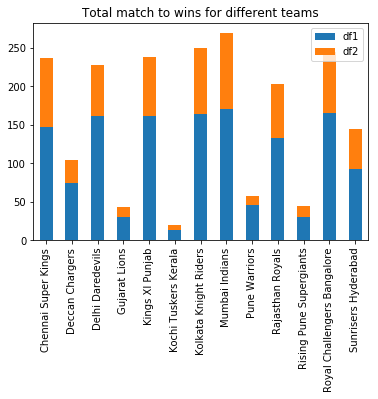

In [72]:
tmw=pd.concat(dict(df1 =total_match, df2 =highest_wins),axis=1,sort=True).plot(kind="bar", stacked=True)
tmw.set_title("Total match to wins for different teams")

3.5 Winning percentages for all the teams

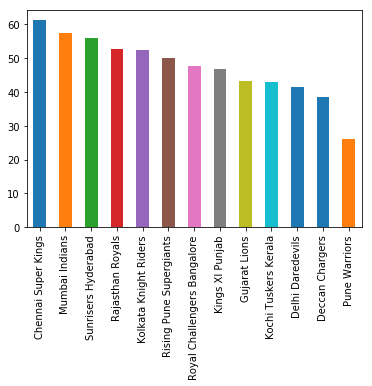

In [91]:
tm=teamA+teamB
hw=df['winner'].value_counts().sort_index()
wp=((hw/tm)*100).sort_values(ascending=False)
wp.plot.bar()

In [265]:
output_file("line.html")

p = figure(plot_width=400, plot_height=400)
p.vbar([6,13,20,27,34,41,48,55,62,68,75,82,88,94,100],top=highest_wins,width=1)
show(p)

C:\Program Files\Anaconda\lib\site-packages\bokeh\models\sources.py:110: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('top', 13), ('x', 15)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))


3.6 Teams winning how many games in individual years

In [175]:

df.groupby(['season'])['winner'].value_counts()

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
        Kolkata Knight Riders           6
        Royal Challengers Bangalore     4
        Deccan Chargers                 2
2009    Delhi Daredevils               10
        Deccan Chargers                 9
        Royal Challengers Bangalore     9
        Chennai Super Kings             8
        Kings XI Punjab                 7
        Rajasthan Royals                6
        Mumbai Indians                  5
        Kolkata Knight Riders           3
2010    Mumbai Indians                 11
        Chennai Super Kings             9
        Deccan Chargers                 8
        Royal Challengers Bangalore     8
        Delhi Daredevils                7
        Kolkata Knight Riders           7
        Rajasthan Royals                

3.7 TOP 3 TEAMS ACCORDING TO NUMBER OF WINS

Text(0.5,1,'Top 3 teams in IPL')

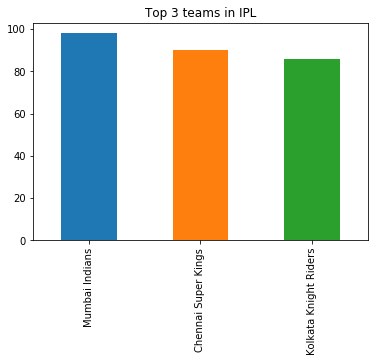

In [92]:
top3=df['winner'].value_counts().head(3).plot.bar()
top3.set_title("Top 3 teams in IPL")

3.8 BOTTOM 3 TEAMS ACCORDING TO NUMBER OF WINS

Text(0.5,1,'Least performers')

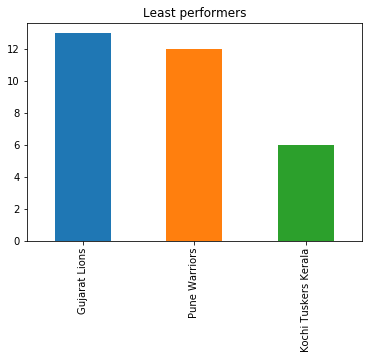

In [480]:
low3=df['winner'].value_counts().tail(3).plot.bar()
low3.set_title("Least performers")

3.9 TEAMS WITH HIGHEST AND LOWEST NO. OF WINS IN THEIR BAG

In [94]:
t1=df['winner'].value_counts().head(1)
l1=df['winner'].value_counts().tail(1)
print("Team that has won the highest no. of matches {}".format(t1))
print("Team that has won the lowest no. of matches {}".format(l1))

Team that has won the highest no. of matches Mumbai Indians    98
Name: winner, dtype: int64
Team that has won the lowest no. of matches Kochi Tuskers Kerala    6
Name: winner, dtype: int64


# 4. ANALYSIS- Team: MUMBAI INDIANS

4.1 NUMBER OF WINS FOR MUMBAI INDIANS OVER THE YEARS

In [1]:
wins_mumbai=df[df['winner']=='Mumbai Indians']['season'].value_counts().sort_index().plot.bar()
wins_mumbai.set_title("How has Mumbai Indians performed over the years")


NameError: name 'df' is not defined

4.2 MOST VALUABLE PLAYER FOR MUMBAI INDIANS

Text(0.5,1,'VIP players for Mumbai Indians')

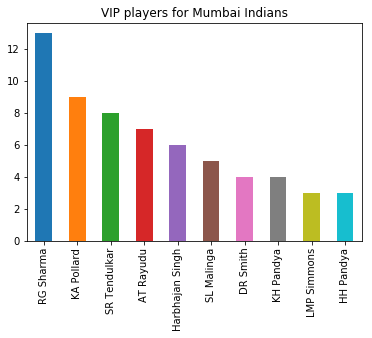

In [14]:
mum_vip=df[df['winner']=='Mumbai Indians']['player_of_match'].value_counts().head(10).plot.bar()
mum_vip.set_title("VIP players for Mumbai Indians")

4.3 BEST INDIVIDUAL GROUND FOR MUMBAI INDIANS 

Text(0.5,1,'Which venue has Mumbai Indians won the most')

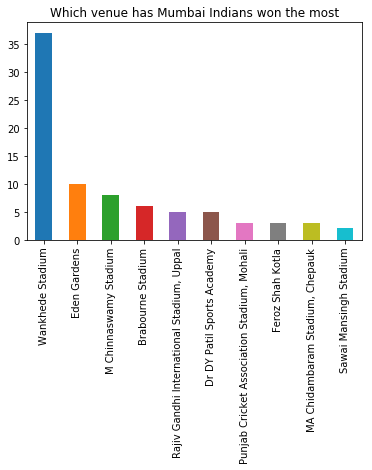

In [15]:
winat_venue=df[df['winner']=='Mumbai Indians']['venue'].value_counts().head(10).plot.bar()
winat_venue.set_title("Which venue has Mumbai Indians won the most")

4.4 TEAMS THAT WIN THE TOSS AND MATCH AT THE SAME TIME

Text(0.5,1,'Teams winning most toss and match at same time')

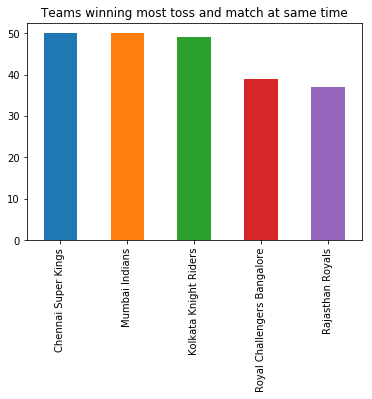

In [31]:
win_tossnmatch=df[df['toss_winner']==df['winner']]['winner'].value_counts().head(5).plot.bar()
win_tossnmatch.set_title("Teams winning most toss and match at same time")

4.5 MUMBAI INDIANS LOOSING THE TOSS BUT WINNING THE MATCH

'Now it is time to see how many times Mumbai Indians have lost the toss but won the match'

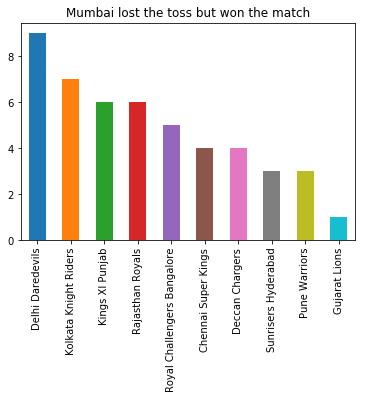

In [23]:
losetoss_winmatch=df[(df['winner']=='Mumbai Indians') & (df['toss_winner']!='Mumbai Indians')]['toss_winner'].value_counts().head(10).plot.bar()
losetoss_winmatch.set_title("Mumbai lost the toss but won the match")

4.6 MUMBAI INDIANS WINNING THE TOSS BUT LOOSING THE MATCH

'Now it is time to see how many times Mumbai Indians have won the toss and match as well'

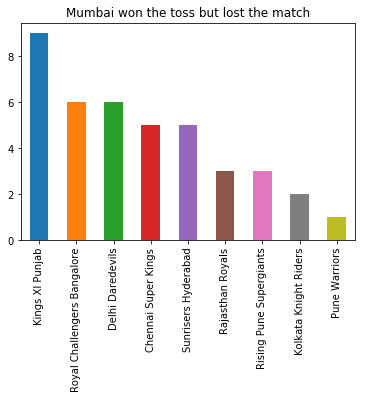

In [25]:
win_toss_match=df[(df['winner']!='Mumbai Indians') & (df['toss_winner']=='Mumbai Indians')]['winner'].value_counts().head(10).plot.bar()
win_toss_match.set_title("Mumbai won the toss but lost the match")


4.7 MUMBAI INDIANS LOOSING THE TOSS AND THE MATCH

'Now it is time to see how many times Mumbai Indians have won the toss and match as well'

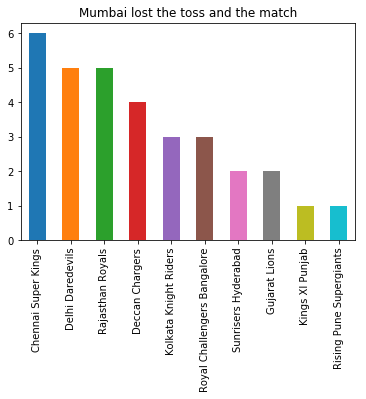

In [27]:
losttossmatch=df[(df['winner']!='Mumbai Indians') & (df['toss_winner']!='Mumbai Indians') & ((df['team1']=='Mumbai Indians') | (df['team2']=='Mumbai Indians'))]['winner'].value_counts().head(10).plot.bar()
losttossmatch.set_title("Mumbai lost the toss and the match")

# 5. TOSS STATISTICS

5.1 WHAT DOES TEAM MUMBAI INDIANS LIKE TO DO WHEN THEY WIN THE TOSS AGAINST PARTICULAR TEAMS

In [30]:
df1=df[(df['toss_winner']=='Mumbai Indians') & (df['venue']=='Wankhede Stadium')]
df1.groupby(['toss_winner','team1','team2','toss_decision'])['toss_winner'].count()

toss_winner     team1                        team2                        toss_decision
Mumbai Indians  Chennai Super Kings          Mumbai Indians               field            2
                Deccan Chargers              Mumbai Indians               field            1
                Gujarat Lions                Mumbai Indians               field            1
                Kings XI Punjab              Mumbai Indians               field            3
                Kolkata Knight Riders        Mumbai Indians               field            5
                Mumbai Indians               Chennai Super Kings          bat              3
                                             Delhi Daredevils             bat              1
                                             Kings XI Punjab              bat              2
                                             Kolkata Knight Riders        bat              1
                                             Pune Warriors                b

5.2 GAMES CONDUTED IN IPL IN DIFFERENT YEARS

In [168]:
df['season'].value_counts().sort_index()

2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
Name: season, dtype: int64

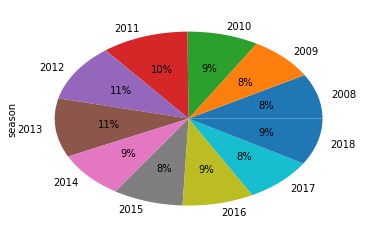

In [98]:
df['season'].value_counts().sort_index().plot.pie(autopct='%1.0f%%')

5.3 RESULT COUNTS

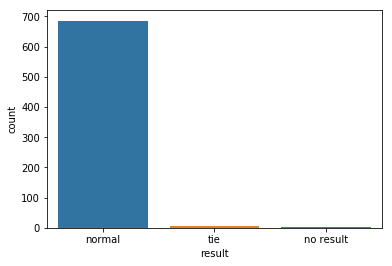

In [105]:
mresults=df['result']
sns.countplot(x=mresults)

5.4 NUMBER OF MATCHES TEAMS WON CHASING AND DEFENDING

In [106]:
'''Let us see when did the teams batting second won the match'''
new_df=df[df['win_by_wickets'] > 0]['winner'].count()
new_bf=df[df['win_by_runs'] > 0]['winner'].count()
print("Matches won while batting second: {}".format(new_df))
print("Matches won while defending: {}".format(new_bf))

Matches won while batting second: 371
Matches won while defending: 315


5.5 BEST CHASING SIDES

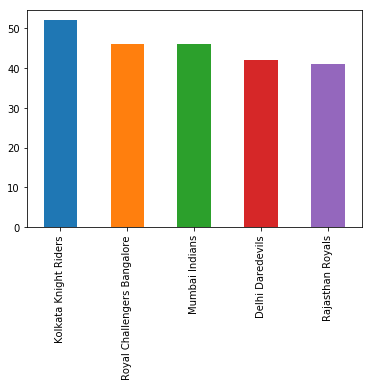

In [139]:
chaser=df[df['win_by_wickets']>0]['winner'].value_counts().head(5).plot.bar()
chaser

5.6 BEST DEFENDING SIDE

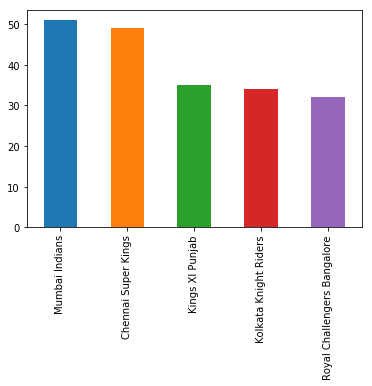

In [577]:
bestbowlingsides=df[df['win_by_runs']>0]['winner'].value_counts().head(5).plot.bar()
bestbowlingsides

5.7 VENUE HOSTING MOST NUMBER OF FINALS

In [110]:
finalsvenue=df.groupby(['season']).tail(1)
finalsvenue['venue'].value_counts()

Dr DY Patil Sports Academy                   2
M Chinnaswamy Stadium                        2
MA Chidambaram Stadium, Chepauk              2
Eden Gardens                                 2
Rajiv Gandhi International Stadium, Uppal    1
New Wanderers Stadium                        1
Wankhede Stadium                             1
Name: venue, dtype: int64

5.8 TEAMS REACHING MOST NUMBER OF IPL FINALS

In [143]:
tf1=finalsvenue['team1']
tf2=finalsvenue['team2']
total_finals=tf1.append(tf2).value_counts()
total_finals

Chennai Super Kings            7
Mumbai Indians                 4
Royal Challengers Bangalore    3
Kolkata Knight Riders          2
Sunrisers Hyderabad            2
Rajasthan Royals               1
Kings XI Punjab                1
Deccan Chargers                1
Rising Pune Supergiants        1
dtype: int64

5.9 TEAMS CONVERTING THE MOST AFTER REACHING THE FINALS

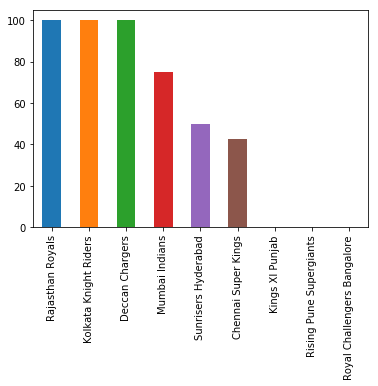

In [116]:
Mosttitles=(titles/total_finals)*100
Mosttitles.sort_values(ascending=False).plot.bar()

# 6. TOSS DECISION

6.1 WHAT DID THE TOSS WINNING SIDES DO WHEN THEY WON TOSS AT PARTICULAR GROUND

In [39]:
'''Now its even important to know what teams usually like to do when they win the toss at various grounds'''
df.groupby(['venue','toss_winner','toss_decision'])['toss_decision'].count()

venue                                                toss_winner                  toss_decision
Barabati Stadium                                     Chennai Super Kings          field             1
                                                     Deccan Chargers              bat               2
                                                     Kings XI Punjab              field             1
                                                     Kolkata Knight Riders        field             3
Brabourne Stadium                                    Chennai Super Kings          field             1
                                                     Delhi Daredevils             field             1
                                                     Kolkata Knight Riders        bat               1
                                                     Mumbai Indians               bat               4
                                                                                  field 

6.2 TEAMS WITH HEAD TO HEAD AGAINST VARIOUS TEAMS

In [271]:
'''Now, it is even important to know which teams had the better of each other when they played together'''
df1=df.groupby(['team1','team2','winner'])['winner'].count().sort_index()
df1

team1                        team2                        winner                     
Chennai Super Kings          Deccan Chargers              Chennai Super Kings            5
                                                          Deccan Chargers                3
                             Delhi Daredevils             Chennai Super Kings            8
                                                          Delhi Daredevils               4
                             Kings XI Punjab              Chennai Super Kings            6
                                                          Kings XI Punjab                3
                             Kochi Tuskers Kerala         Chennai Super Kings            1
                                                          Kochi Tuskers Kerala           1
                             Kolkata Knight Riders        Chennai Super Kings            5
                                                          Kolkata Knight Riders          7
    

6.3 MUMBAI INDIANS HEAD TO HEAD MATCHES AGAINST DIFFERENT TEAMS AT WANKHEDE STADIUM

In [144]:
df2=df[(df['team1']=='Mumbai Indians') & (df['venue']=='Wankhede Stadium')]
df2.groupby(['team1','team2','winner'])['winner'].count().sort_index()

team1           team2                        winner                     
Mumbai Indians  Chennai Super Kings          Chennai Super Kings            3
                                             Mumbai Indians                 3
                Delhi Daredevils             Delhi Daredevils               2
                                             Mumbai Indians                 4
                Gujarat Lions                Gujarat Lions                  1
                Kings XI Punjab              Kings XI Punjab                1
                                             Mumbai Indians                 3
                Kochi Tuskers Kerala         Kochi Tuskers Kerala           1
                Kolkata Knight Riders        Mumbai Indians                 3
                Pune Warriors                Mumbai Indians                 1
                Rajasthan Royals             Mumbai Indians                 3
                                             Rajasthan Royals        

6.4 MUMBAI INDIANS AGAINST DIFFERENT SIDES OUTSIDE WANKHEDE STADIUM

In [191]:
df2=df[(df['team2']=='Mumbai Indians') & (df['venue']!='Wankhede Stadium')]
df2.groupby(['team2','team1','winner'])['winner'].count().sort_index()

team2           team1                        winner                     
Mumbai Indians  Chennai Super Kings          Chennai Super Kings            5
                                             Mumbai Indians                 4
                Deccan Chargers              Deccan Chargers                2
                                             Mumbai Indians                 1
                Delhi Daredevils             Delhi Daredevils               4
                                             Mumbai Indians                 1
                Gujarat Lions                Mumbai Indians                 1
                Kings XI Punjab              Kings XI Punjab                4
                                             Mumbai Indians                 6
                Kolkata Knight Riders        Kolkata Knight Riders          1
                                             Mumbai Indians                 6
                Pune Warriors                Mumbai Indians          

# 7. VIP PLAYERS IN IPL

7.1 VIP PLAYERS WINNING THE MOST THE NO. OF MATCHES FOR THEIR SIDES

Text(0.5,1,'Highest No. of Man of the Match')

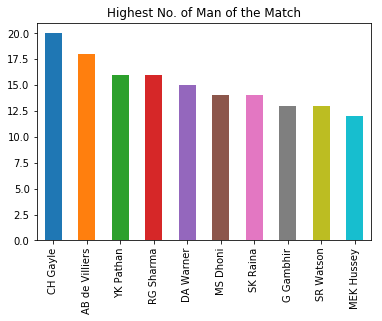

In [66]:
fig=df['player_of_match'].value_counts().head(10).plot.bar()
fig.set_title("Highest No. of Man of the Match")

7.2 THE GROUND WHICH CH GAYLE LIKED THE MOST

In [509]:
t1=df[(df['player_of_match']=='CH Gayle')]['venue'].value_counts()
t1

M Chinnaswamy Stadium                                   9
Punjab Cricket Association IS Bindra Stadium, Mohali    2
Eden Gardens                                            2
Punjab Cricket Association Stadium, Mohali              1
Kingsmead                                               1
Subrata Roy Sahara Stadium                              1
Saurashtra Cricket Association Stadium                  1
Wankhede Stadium                                        1
MA Chidambaram Stadium, Chepauk                         1
Feroz Shah Kotla                                        1
Name: venue, dtype: int64

7.3 DOES CH GAYLE LIKES TO BAT FIRST OR BAT SECOND

In [521]:
t2=df[(df['player_of_match']=='CH Gayle') & (df['venue']=='M Chinnaswamy Stadium') & (df['win_by_wickets']>0)]['venue'].value_counts()
t3=df[(df['player_of_match']=='CH Gayle') & (df['venue']=='M Chinnaswamy Stadium') & (df['win_by_runs']>0)]['venue'].value_counts()
print("The games which CH Gayle won for their side batting second {}".format(t2))
print("The games which CH Gayle won for their side batting first {}".format(t3))

The games which CH Gayle won for their side batting second M Chinnaswamy Stadium    5
Name: venue, dtype: int64
The games which CH Gayle won for their side batting first M Chinnaswamy Stadium    4
Name: venue, dtype: int64


# 8. WORST TEAM IN IPL

8.1 WORST TEAM IN THE IPL

In [178]:
'''Now if I have to figure out where did Kerala Tuskers go wrong'''

'''As Kochi played only in one of the IPL's and they didn't have much success so this was soo obvious'''
df[(df['winner']=='Kochi Tuskers Kerala')]['winner'].value_counts()

Kochi Tuskers Kerala    6
Name: winner, dtype: int64

8.2 ACCORDING TO PERFORMANCE IN MORE THAN 4 or MORE IPLs WHICH IS THE BEST TEAM

In [185]:
'''As we see that in this particular season Kochi wasn't in the top 4 of this season and they never played IPL again soo the win percentage didn't increase'''
'''So, for us teams like Kochi, Gujarat, Pune Warriors , Pune Supergiants are kind of a outliers as they 1,2 or 3 seasons'''
df['winner'].value_counts().tail(5)

Deccan Chargers            29
Rising Pune Supergiants    15
Gujarat Lions              13
Pune Warriors              12
Kochi Tuskers Kerala        6
Name: winner, dtype: int64

8.3 PERFORMANCE OF DECCAN CHARGERS

Text(0.5,1,'Performance of Deccan Chargers')

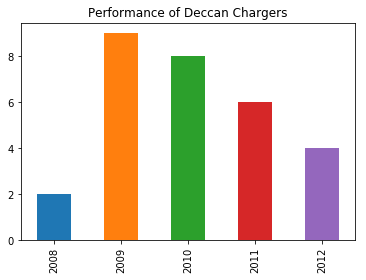

In [367]:
'''Now, for the most underforming team I'll be looking at the performance of Deccan Charges as they have played handful of games'''
wdc=df[df['winner']=='Deccan Chargers']['season'].value_counts().sort_index().plot.bar()
wdc.set_title("Performance of Deccan Chargers")

8.4 PERFORMANCE OF DECCAN CHARGERS WITHE VARIOUS TEAMS AT HOME

In [370]:
df2=df[(df['team1']=='Deccan Chargers') & (df['venue']=='Rajiv Gandhi International Stadium, Uppal')]
df2.groupby(['team1','team2','winner'])['winner'].count().sort_index()

team1            team2                        winner                     
Deccan Chargers  Chennai Super Kings          Chennai Super Kings            1
                 Delhi Daredevils             Delhi Daredevils               3
                 Kings XI Punjab              Kings XI Punjab                2
                 Pune Warriors                Pune Warriors                  1
                 Rajasthan Royals             Rajasthan Royals               2
                 Royal Challengers Bangalore  Deccan Chargers                2
                                              Royal Challengers Bangalore    1
Name: winner, dtype: int64

8.5 PERFORMANCE OF DECCAN CHARGERS OUTSIDE HOME

In [190]:
'''Head to head performance outside home'''
df2=df[(df['team2']=='Deccan Chargers') & (df['venue']!='Rajiv Gandhi International Stadium, Uppal')]
df2.groupby(['team2','team1','winner'])['winner'].count().sort_index()

team2            team1                        winner                     
Deccan Chargers  Chennai Super Kings          Chennai Super Kings            5
                                              Deccan Chargers                3
                 Delhi Daredevils             Deccan Chargers                1
                                              Delhi Daredevils               2
                 Kings XI Punjab              Deccan Chargers                1
                                              Kings XI Punjab                1
                 Kolkata Knight Riders        Deccan Chargers                2
                                              Kolkata Knight Riders          3
                 Mumbai Indians               Deccan Chargers                1
                                              Mumbai Indians                 2
                 Pune Warriors                Deccan Chargers                1
                 Rajasthan Royals             Rajasthan R

8.6 PERFORMANCE OF DECCAN CHAGERS VS BEST SIDE OF IPL

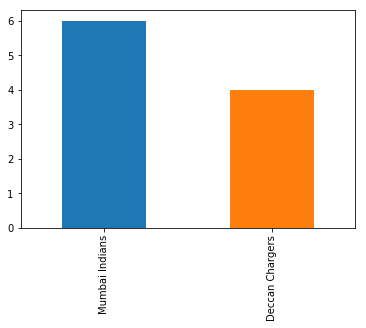

In [374]:
'''Let us even check how did the best and the worst team perform on head to head'''
h2h=df[((df['team1']=='Mumbai Indians') & (df['team2']=='Deccan Chargers')) | 
       ((df['team2']=='Mumbai Indians') & (df['team1']=='Deccan Chargers'))]['winner'].value_counts().plot.bar()
h2h

8.7 PERFORMANCE OF DECCAN CHARGERS VS THE 2nd SIDE IN IPL

9.1 A PAIR PLOT BETWEEN TEAM1, TEAM2 and the WINNER TEAM

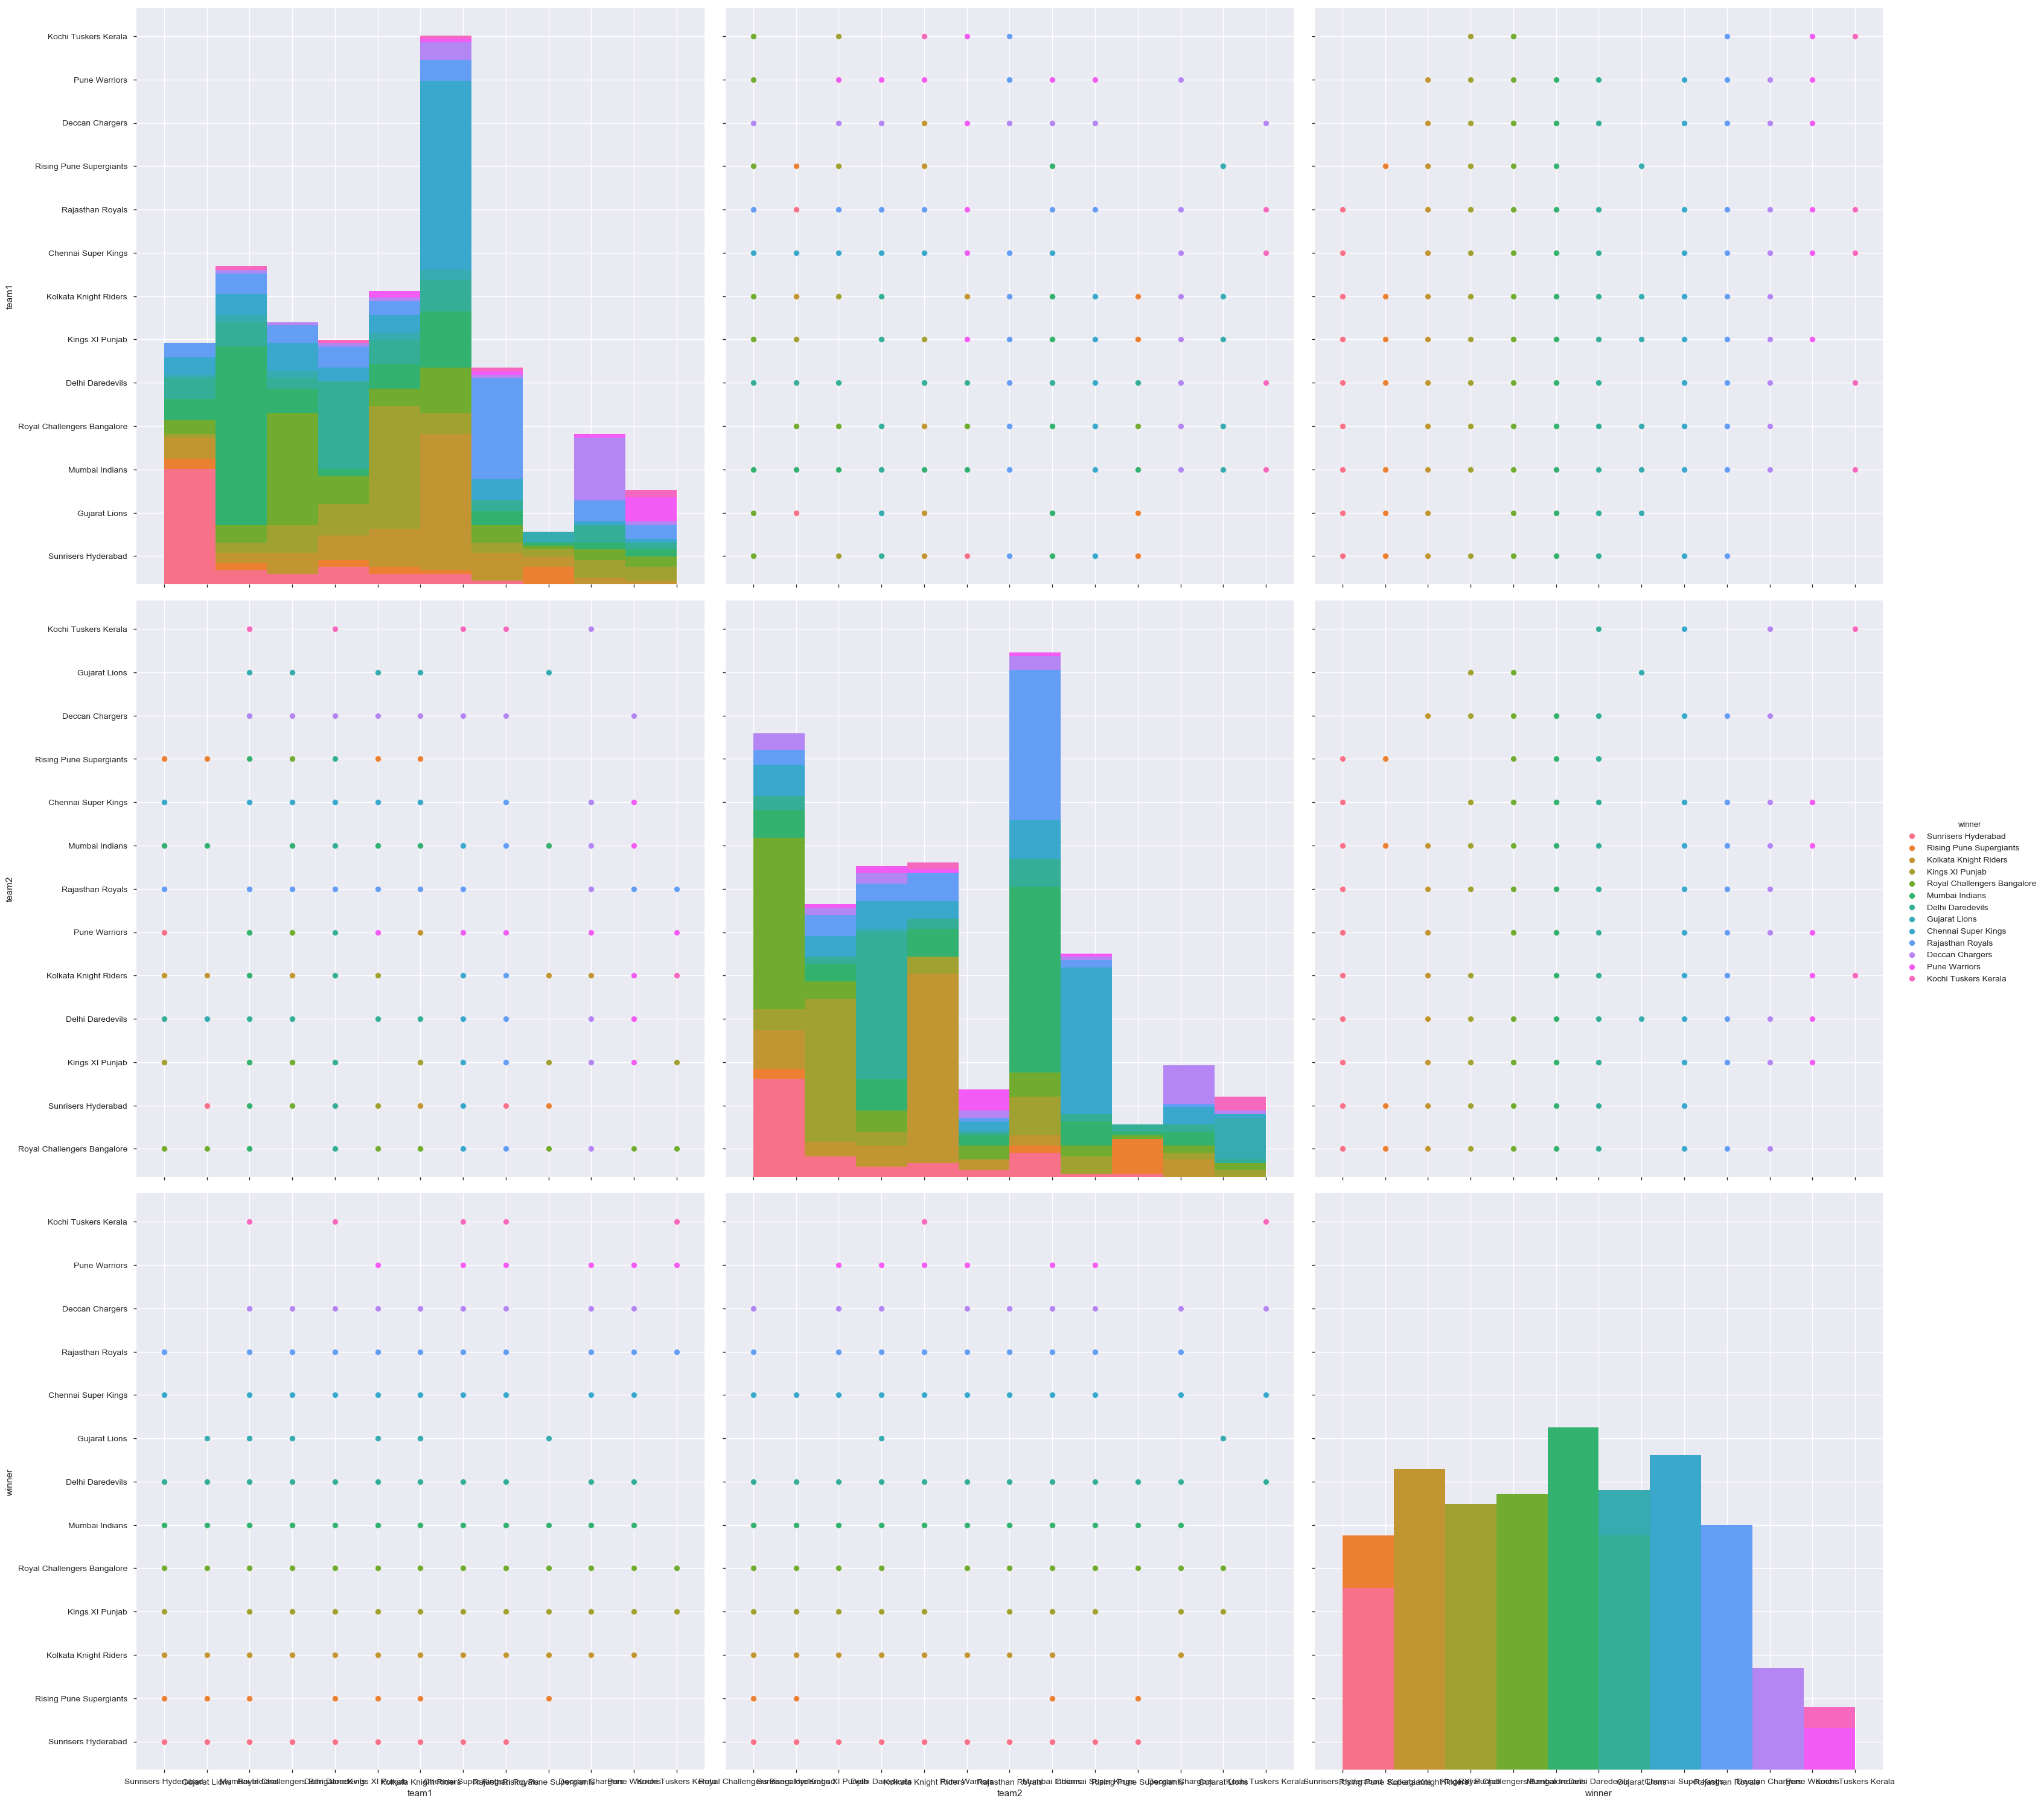

In [181]:
sns.pairplot(df,hue='winner',vars=['team1','team2','winner'], size=10)

Conclusion-
1. The team which has the best performance in all of the 11 IPL's is Mumbai Indians.
2. But, with the research being done on the dataset; I found out that indeed Chennai Super Kings are the most consistent performers in all the IPL's that they have played. As, they have had made to the finals 7 times but, somehow they did end up only winning up 3 titles.
3. Coming to best chasing side- It was the Kolkata Knight Riders and the best defending side- It was the Mumbai Indians.
4. Coming to the VIP players - It was CH Gayle that won their side the most no. of games firstly, he use to play for the KKR  then RCB and then he is finally with the KXIP and he liked M Chinnaswamy Stadium as his favourite ground.
5. Talking about the worst team - According to my analysis when I left out teams who have had played only 2-3 IPL's it was the Deccan Chargers who turned out as the worst. Now, as Deccan Chargers don't play in the IPL anymore my eyes would be set on Delhi Daredevils for turning out to be the worst team in the IPL.
